<a href="https://colab.research.google.com/github/SwamptoForest/exp/blob/main/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
!unzip human+activity+recognition+using+smartphones.zip

--2026-02-26 08:03:11--  https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘human+activity+recognition+using+smartphones.zip’

human+activity+reco     [       <=>          ]  58.18M  44.1MB/s    in 1.3s    

2026-02-26 08:03:13 (44.1 MB/s) - ‘human+activity+recognition+using+smartphones.zip’ saved [61005872]

Archive:  human+activity+recognition+using+smartphones.zip
 extracting: UCI HAR Dataset.names   
 extracting: UCI HAR Dataset.zip     


In [ ]:
!unzip "UCI HAR Dataset.zip"

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def get_human_dataset():

    # 1. 피처명 데이터 로드
    feature_name_df = pd.read_csv('human_activity/features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])

    # 2. 중복된 피처명 처리 (이 부분이 핵심!)
    # groupby와 cumcount를 써서 중복 횟수를 구하고, 중복이 있으면 이름 뒤에 _1, _2를 붙임
    feature_name_df['dup_cnt'] = feature_name_df.groupby('column_name').cumcount()
    feature_name_df['column_name'] = feature_name_df.apply(
        lambda x: f"{x['column_name']}_{x['dup_cnt']}" if x['dup_cnt'] > 0 else x['column_name'],
        axis=1
    )

    # 3. 리스트로 반환
    feature_name = feature_name_df['column_name'].values.tolist()

    # 4. 학습/테스트 데이터 로드 (이제 에러 안 남)
    X_train = pd.read_csv('human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    y_train = pd.read_csv('human_activity/train/y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep='\s+', names=['action'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

print("데이터 로드 완료! X_train 모양:", X_train.shape)

데이터 로드 완료! X_train 모양: (7352, 561)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(n_estimators=200,
                         random_state=10,
                         learning_rate=0.05)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('AdaBoost 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

AdaBoost 정확도: 0.5310


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

base_model = DecisionTreeClassifier(max_depth=3, random_state=10)
clf = AdaBoostClassifier(estimator=base_model,n_estimators=30,
                         random_state=10,
                         learning_rate=0.1)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('AdaBoost 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

AdaBoost 정확도: 0.8941


In [ ]:
--------------------------------------------------------G B M-------------------------------------------------------------

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

KeyboardInterrupt: 

In [ ]:
print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time)) # 프린트 내용 중괄호 안 콜론 앞에 공백이 있어서 12분 걸렸는데 오류를 뱉어서 수정하고 재실행하다가
                                                                    # 그냥 밑에 프린트만 다시 해도 될 것 같아서 했습니다.

GBM 정확도: 0.9379
GBM 수행 시간: 82.3초


In [ ]:
------------------------ XGboost ---------------------------------

In [1]:
import xgboost as xgb ## XGBoost 2271
from xgboost import plot_importance ## Feature Importance 2201 912!
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
---------------------------- LightGBM -----------------------------------------------

In [2]:
from lightgbm import LGBMClassifier # LightGBM 2/27/
import lightgbm as lgb # Import lightgbm to use its callback functions

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset. target

# 에제 데이터 세트 중 80%를 학습, 20%를 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 트리개수는 400개로 지정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LGBM도 XGBoost처럼 early stopping 가능
evals = [(X_test, y_test) ]

# Use callbacks for early stopping and evaluation logging
callbacks = [lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(period=100)]

lgbm_wrapper.fit(X_train, y_train,
                 eval_set=evals,
                 eval_metric='logloss',
                 callbacks=callbacks) # Pass callbacks here
preds = lgbm_wrapper.predict(X_test)

[LightGBM] [Info] Number of positive: 280, number of negative: 175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615385 -> initscore=0.470004
[LightGBM] [Info] Start training from score 0.470004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [5]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n345: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print ('MS: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print ('AUC: {:.4f}'.format (AUC))

get_clf_eval(y_test, preds)

오차행렬:
 [[33  4]
 [ 1 76]]

345: 0.9561
정밀도: 0.9500
MS: 0.9870
F1: 0.9682
AUC: 0.9395


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

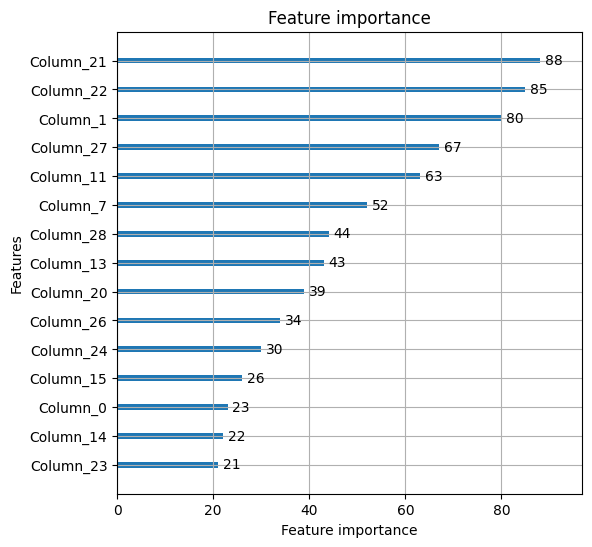

In [6]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize=(6, 6))
plot_importance(lgbm_wrapper, max_num_features=15, ax=ax)